In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea.nanoevents import NanoAODSchema
from coffea import processor
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
samples = [
   
    '2Mu2E_500GeV_5p0GeV_0p8mm',
    "2Mu2E_500GeV_5p0GeV_8p0mm",
    "2Mu2E_500GeV_5p0GeV_40p0mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",
    #"4Mu_500GeV_5p0GeV_0p08mm",
    #"4Mu_500GeV_5p0GeV_0p8mm",
    #"4Mu_500GeV_5p0GeV_40p0mm",
    #"4Mu_500GeV_5p0GeV_80p0mm",
    #"4Mu_500GeV_5p0GeV_8p0mm",

    
  
     "TTJets", 
    
]
fileset = utilities.make_fileset(samples[:-1], 
                                 "llpNanoAOD_v2", 
                                 location_cfg="signal_v6.yaml",
                                 max_files =10
                                 #max_files =1
                                )
fileset = utilities.make_fileset([samples[-1]], 
                                 "llpNanoAOD_v2",
                                 location_cfg="backgrounds.yaml",
                                fileset=fileset,
                                max_files =10, 
                                #max_files =1, 
                                )


runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    #maxchunks=2,
    skipbadfiles=True
)

channels = ["baseNoLj", 
            "base",
            "base_ljObjCut"
           
           ]
p = sidm_processor.SidmProcessor(
    channels,
    ["mu_lj_base"],
    lj_reco_choices=["0.4"],
   
)

output = runner.run(fileset, treename="Events", processor_instance=p)


Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


In [3]:

def plot_histograms(samples, hist_list, channel, n, log = False):
    for h in range(len(histograms_list)):
        if h%n == 0:
            fig, ax = plt.subplots(1, n, figsize = (n*12, 10))
            plt.subplot(1, n, 1)
            for s in samples:
                hists = output["out"][s]["hists"]
                utilities.plot(hists[histograms_list[h]][channel,:],)
                plt.legend(samples)
                ax[0].set_title(channel)
                if log == True:
                    plt.yscale("log")
        else:
            plt.subplot(1, n, h%n+1)
            for s in samples:
                hists = output["out"][s]["hists"]
                utilities.plot(hists[histograms_list[h]][channel,:],)
                plt.legend(samples)
                if log == True:
                    plt.yscale("log")
                ax[h%n].set_title(channel)

def eta_phi(samples, channel):
    fig, ax = plt.subplots(1, 2, figsize = (2*12, 10))

    plt.subplot(1, 2, 1)
    for s in samples:
        hists = output["out"][s]["hists"]
        utilities.plot(hists["mu_lj_muon_eta_phi"][channel, :, :].project("mu_lj_mu_eta"), )
        plt.yscale("log") 
        plt.legend(samples)
        plt.title(channel)
    plt.subplot(1, 2, 2)
    for s in samples:
        hists = output["out"][s]["hists"]
        utilities.plot(hists["mu_lj_muon_eta_phi"][channel, :, :].project("mu_lj_mu_phi"), )
        plt.yscale("log")
        plt.legend(samples)
        plt.title(channel)
    

In this section I will plot the properties of the mu_Ljs


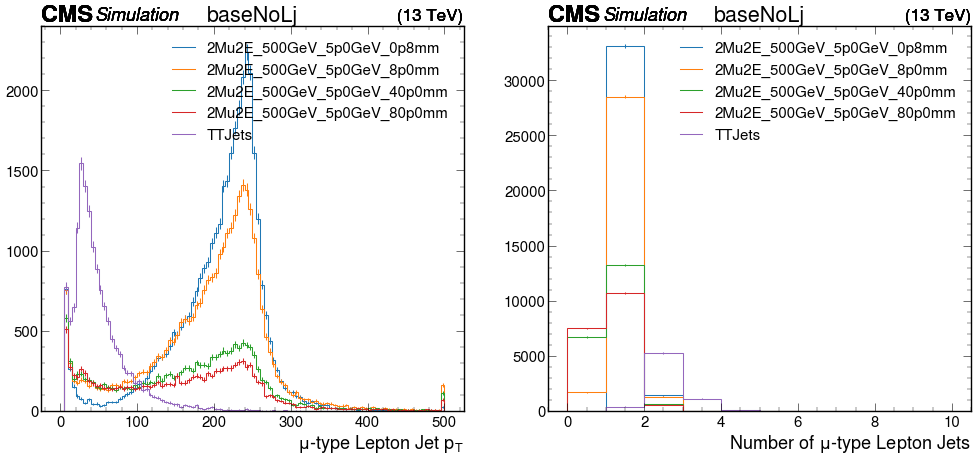

In [4]:
histograms_list = ["mu_lj_pt", "mu_lj_n",]
plot_histograms(samples, histograms_list, "baseNoLj", 2)

Here look a the number of muons in muon type LJs

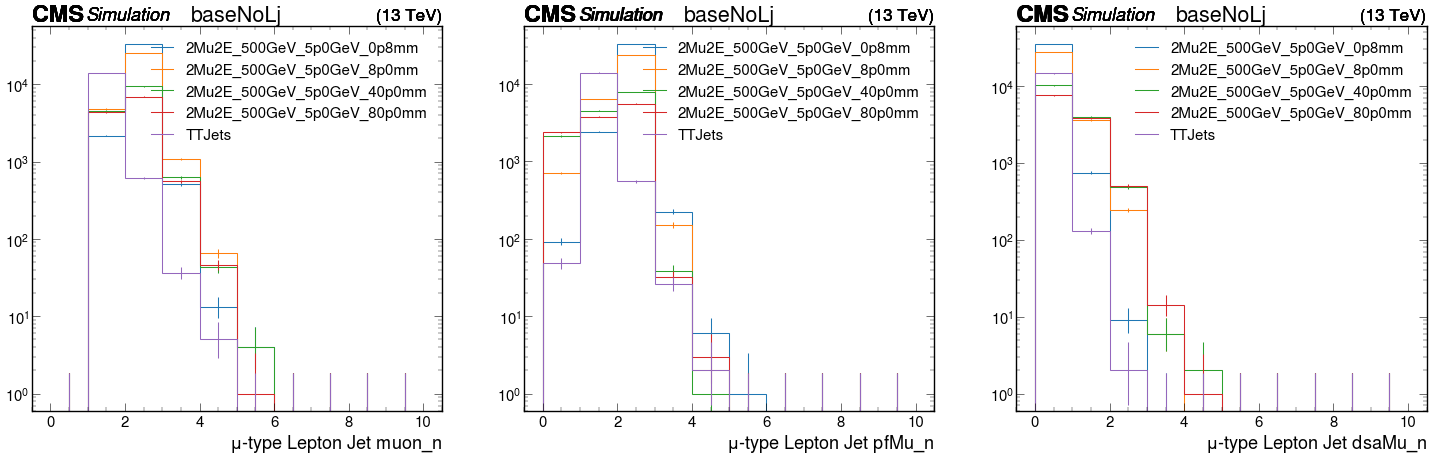

In [5]:
histograms_list = [ "mu_lj_muonN", "mu_lj_pfMu_n", "mu_lj_dsaMu_n",]
plot_histograms(samples, histograms_list, "baseNoLj", 3, log=True)


Here we look at the pT values for all muons, PF muons and DSA muons

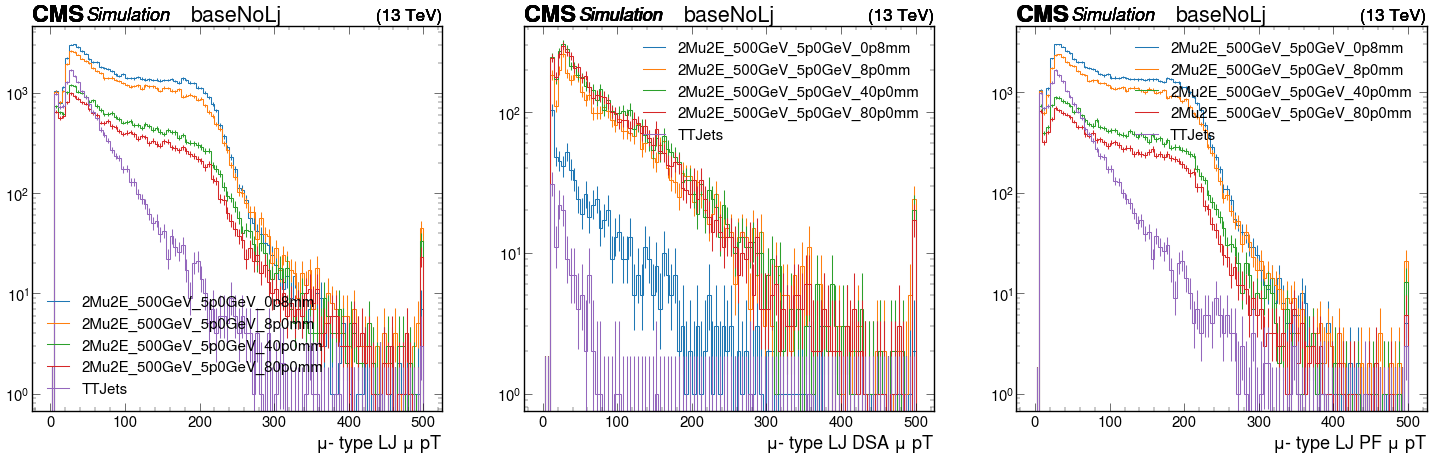

In [6]:
histograms_list = [  "mu_lj_muon_pt", "mu_lj_dsaMuon_pt","mu_lj_pfMuon_pt",]
plot_histograms(samples, histograms_list, "baseNoLj", 3, log=True)
#plot_histograms(samples2, histograms_list, "base_ljObjCut")

Here we look at the dxy values for all muons, PF muons and DSA muons

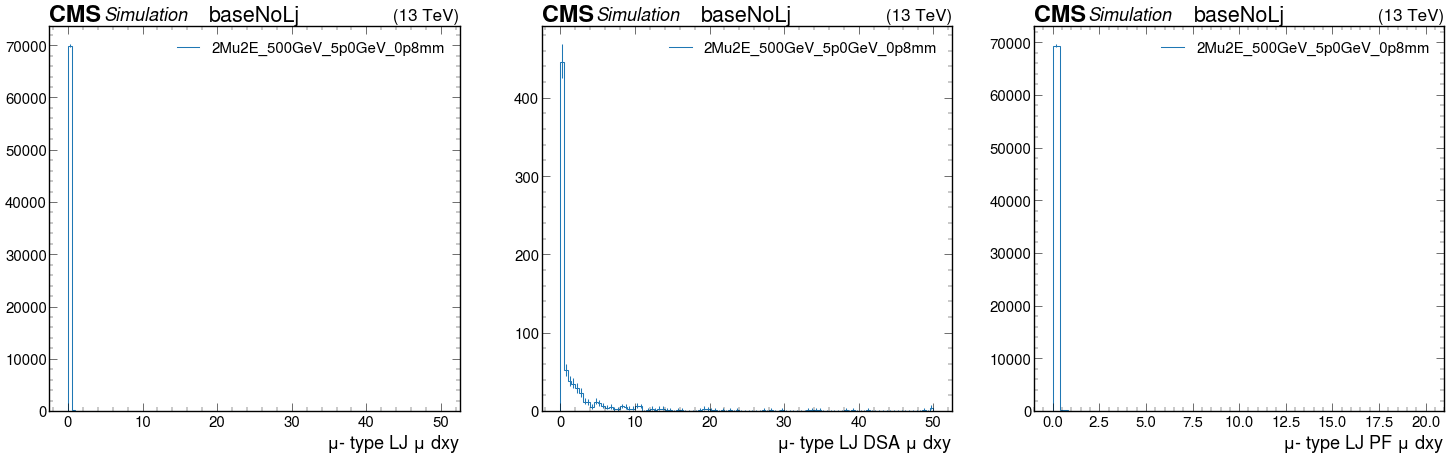

In [7]:
histograms_list = [  "mu_lj_muon_dxy", "mu_lj_dsaMuon_dxy","mu_lj_pfMuon_dxy",]
plot_histograms([samples[0]], histograms_list, "baseNoLj", 3)
#plot_histograms(samples2, histograms_list, "base_ljObjCut")

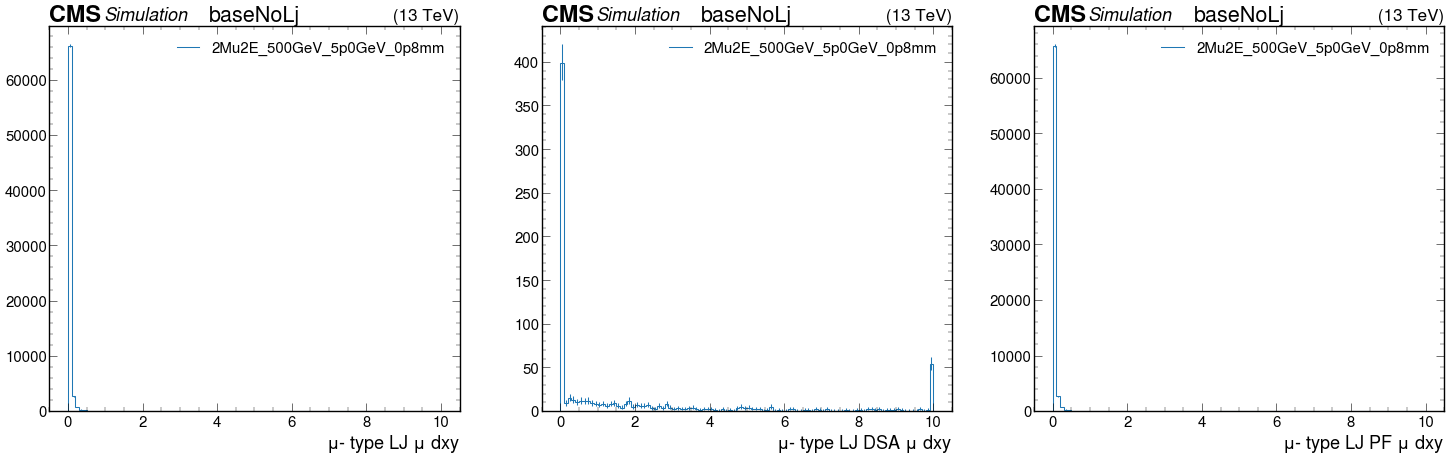

In [8]:
histograms_list =["mu_lj_muon_dxy_lowRange", "mu_lj_dsaMuon_dxy_lowRange","mu_lj_pfMuon_dxy_lowRange",
                    ]
plot_histograms([samples[0]], histograms_list, "baseNoLj", 3,)

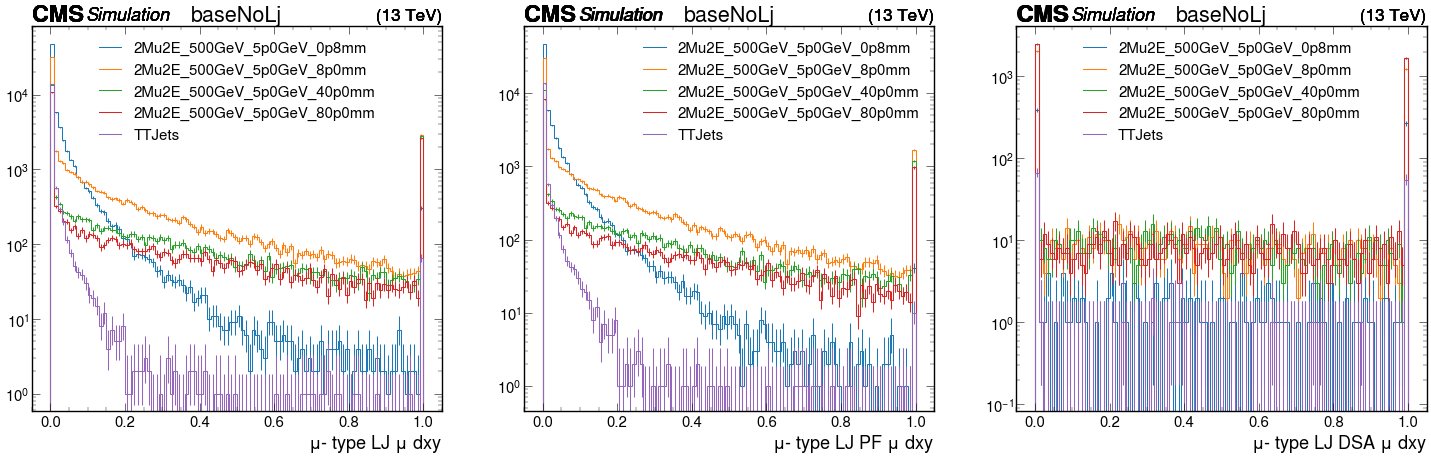

In [9]:
histograms_list =[ "mu_lj_muon_dxy_XLowRange", "mu_lj_pfMuon_dxy_XLowRange", "mu_lj_dsaMuon_dxy_XLowRange", ]
plot_histograms(samples, histograms_list, "baseNoLj", 3, log=True)

Here we look at the minimum dxy for a all muons, PF and DSA Muons.

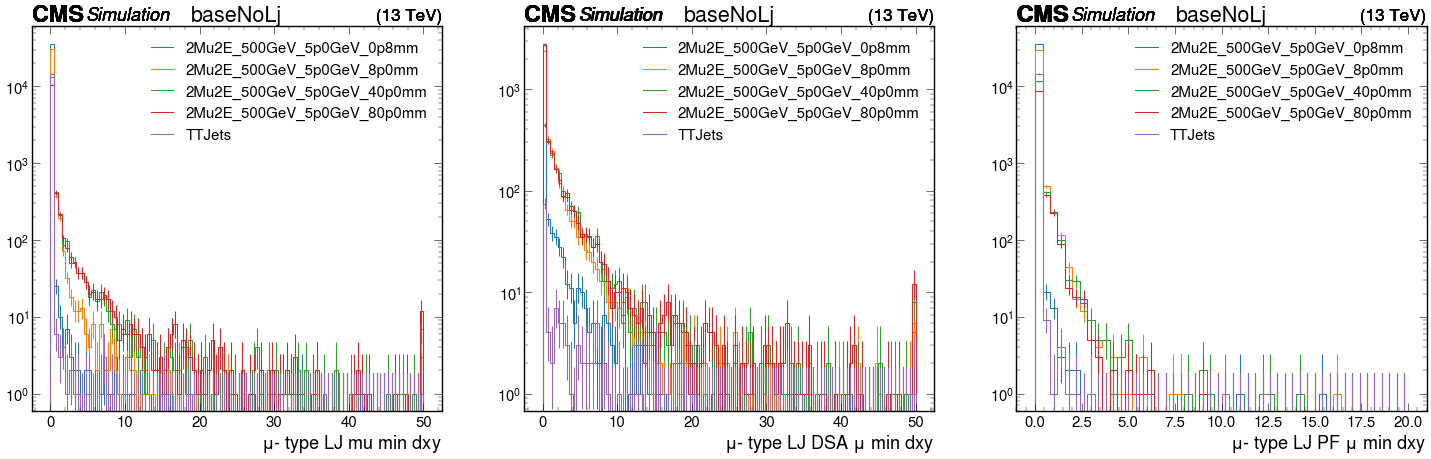

In [10]:
histograms_list = [ "mu_lj_muon_min_dxy","mu_lj_dsaMuon_min_dxy", "mu_lj_pfMuon_min_dxy",]
plot_histograms(samples, histograms_list, "baseNoLj", 3, log=True)
#plot_histograms(samples2, histograms_list, "base_ljObjCut")

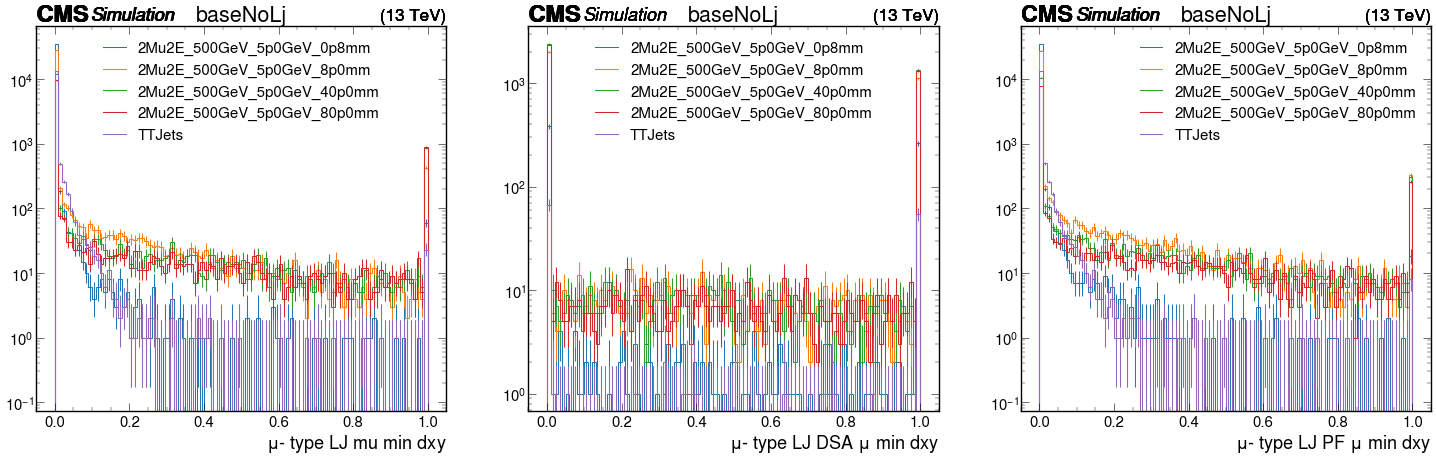

In [11]:
histograms_list = [ "mu_lj_muon_min_dxy_XLowRange","mu_lj_dsaMuon_min_dxy_XLowRange", "mu_lj_pfMuon_min_dxy_XLowRange",]
plot_histograms(samples, histograms_list, "baseNoLj", 3, log=True)
#plot_histograms(samples2, histograms_list, "base_ljObjCut")

Here we look at the max dxy for muons, Pf muons and DSA Muons

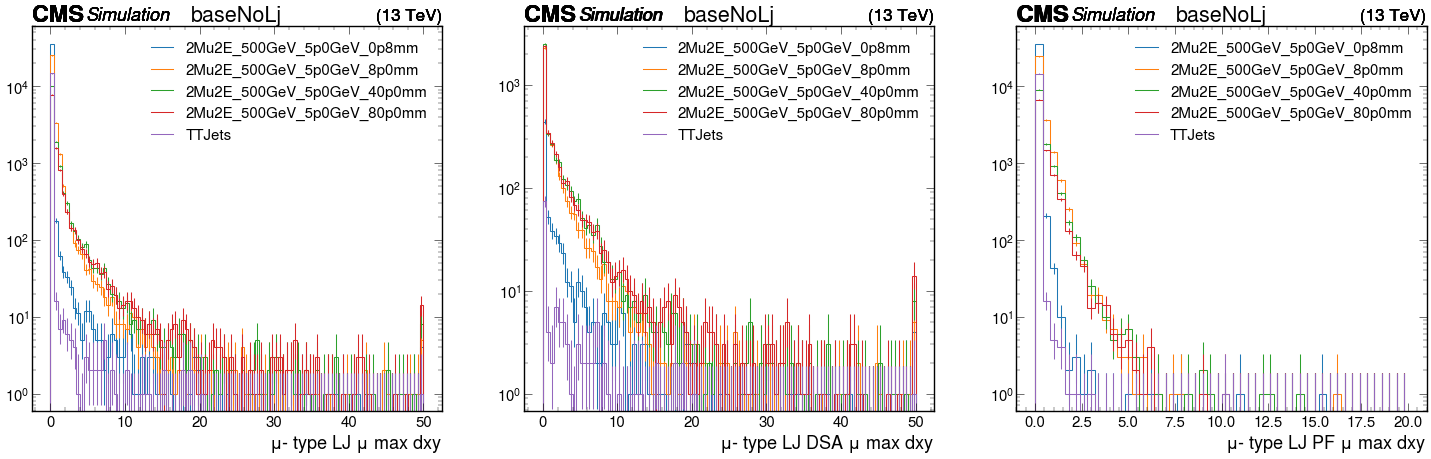

In [12]:
histograms_list = [ "mu_lj_muon_max_dxy","mu_lj_dsaMuon_max_dxy", "mu_lj_pfMuon_max_dxy",]
plot_histograms(samples, histograms_list, "baseNoLj", 3, log=True)
#plot_histograms(samples2, histograms_list, "base_ljObjCut")

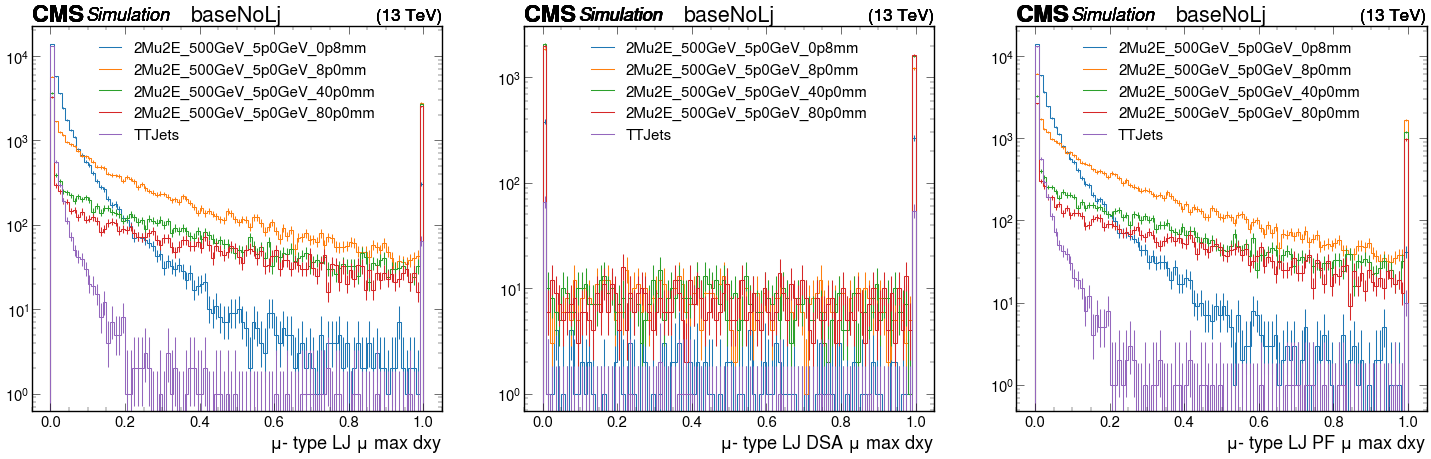

In [13]:
histograms_list = [ "mu_lj_muon_max_dxy_XLowRange","mu_lj_dsaMuon_max_dxy_XLowRange", "mu_lj_pfMuon_max_dxy_XLowRange",]
plot_histograms(samples, histograms_list, "baseNoLj", 3, log=True)
#plot_histograms(samples2, histograms_list, "base_ljObjCut")

Here we plot the eta phi plots for all the muons in the mu type lepton jets.

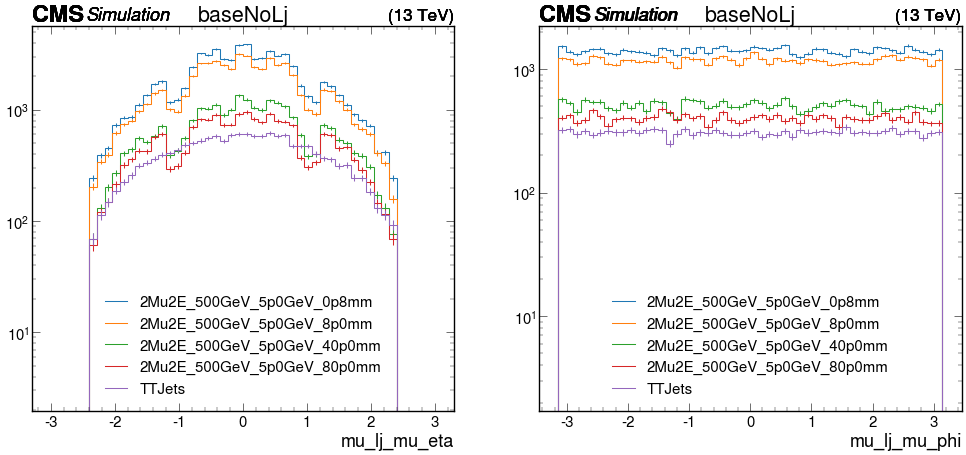

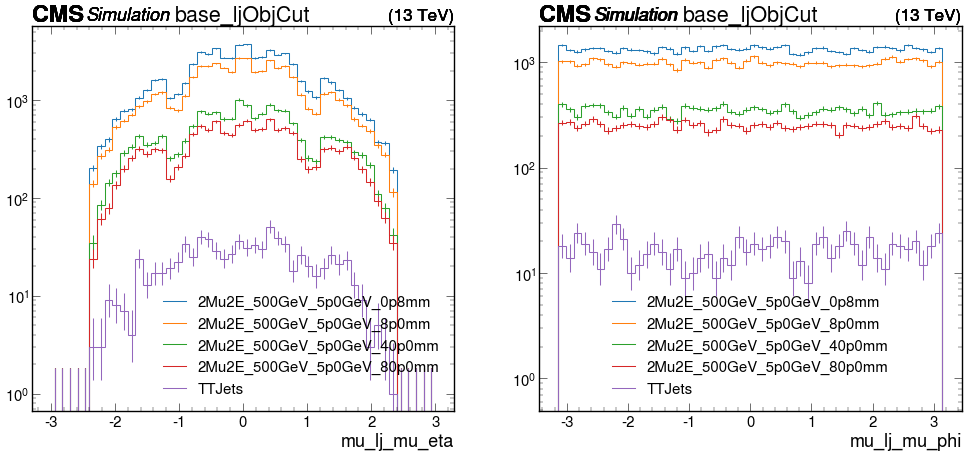

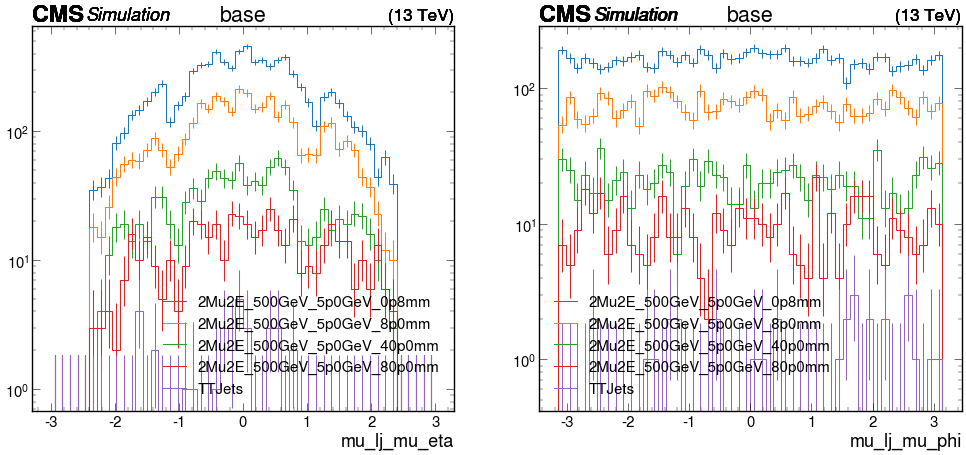

In [14]:
eta_phi(samples, "baseNoLj")
eta_phi(samples, "base_ljObjCut")
eta_phi(samples, "base")


Here we look at the various properties of the dsa Muons in the mu-type lepton jets.

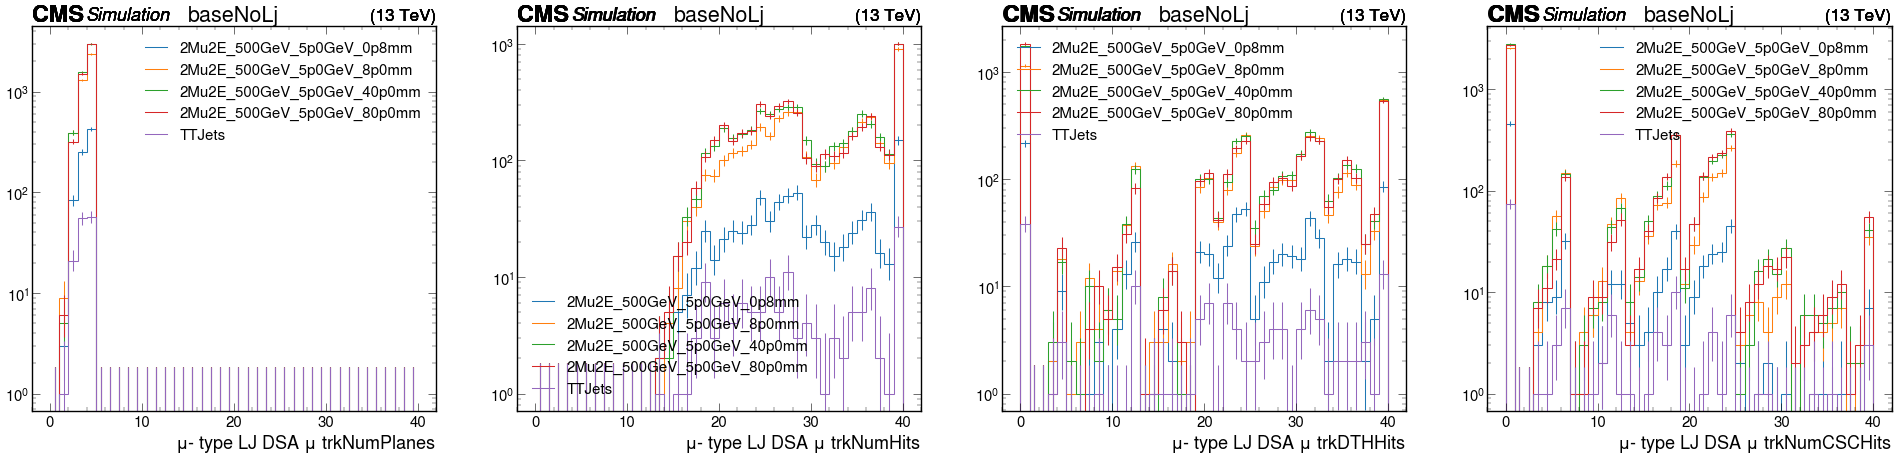

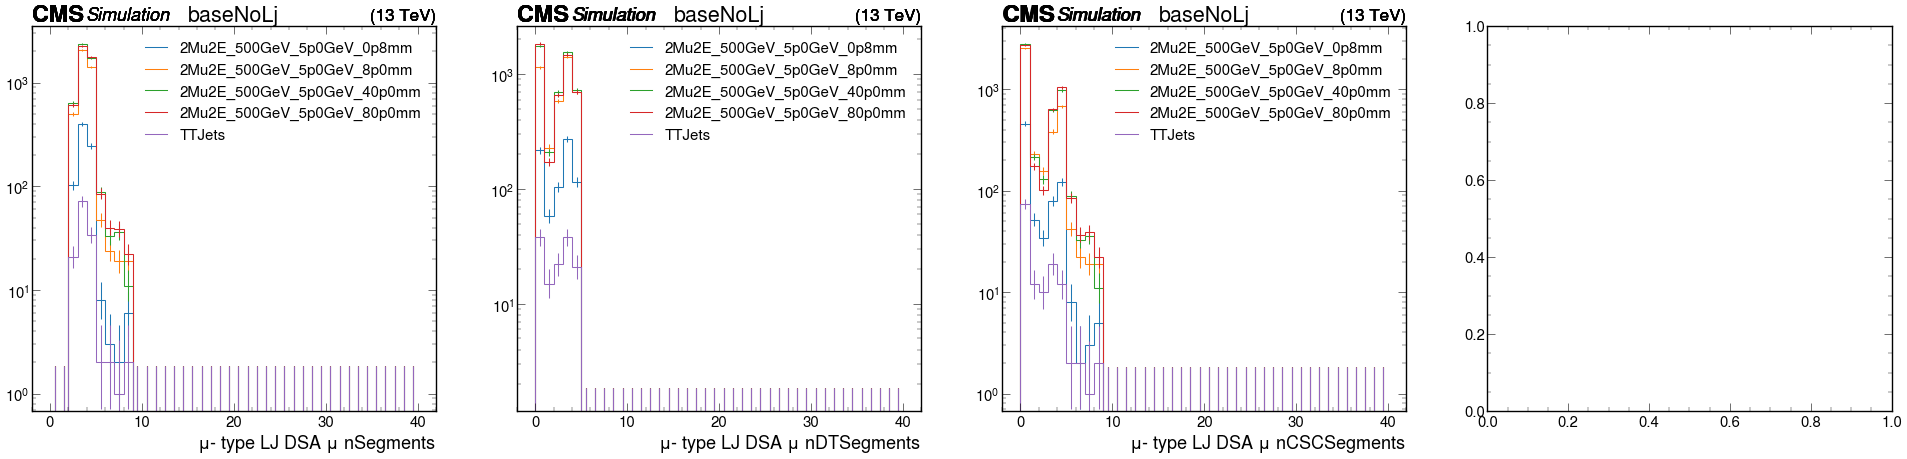

In [15]:
histograms_list = [ "mu_lj_dsaMu_trkNumPlanes", "mu_lj_dsaMu_trkNumHits", "mu_lj_dsaMu_trkNumDTHits",
                   "mu_lj_dsaMu_trkNumCSCHits", "mu_lj_dsaMu_nSegments",
                  "mu_lj_dsaMu_nDTSegments", "mu_lj_dsaMu_nCSCSegments"]
plot_histograms(samples, histograms_list, "baseNoLj", 4, log=True)

Here we look at the various properties of the PF muons in the lepton jets.

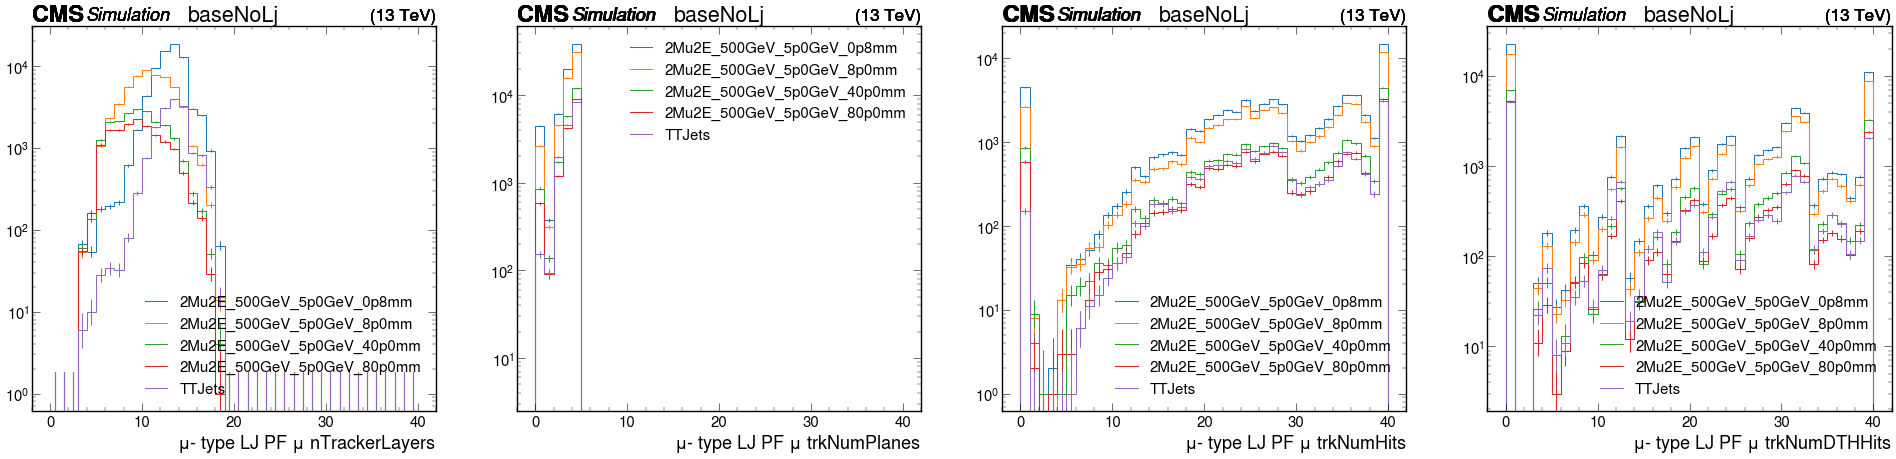

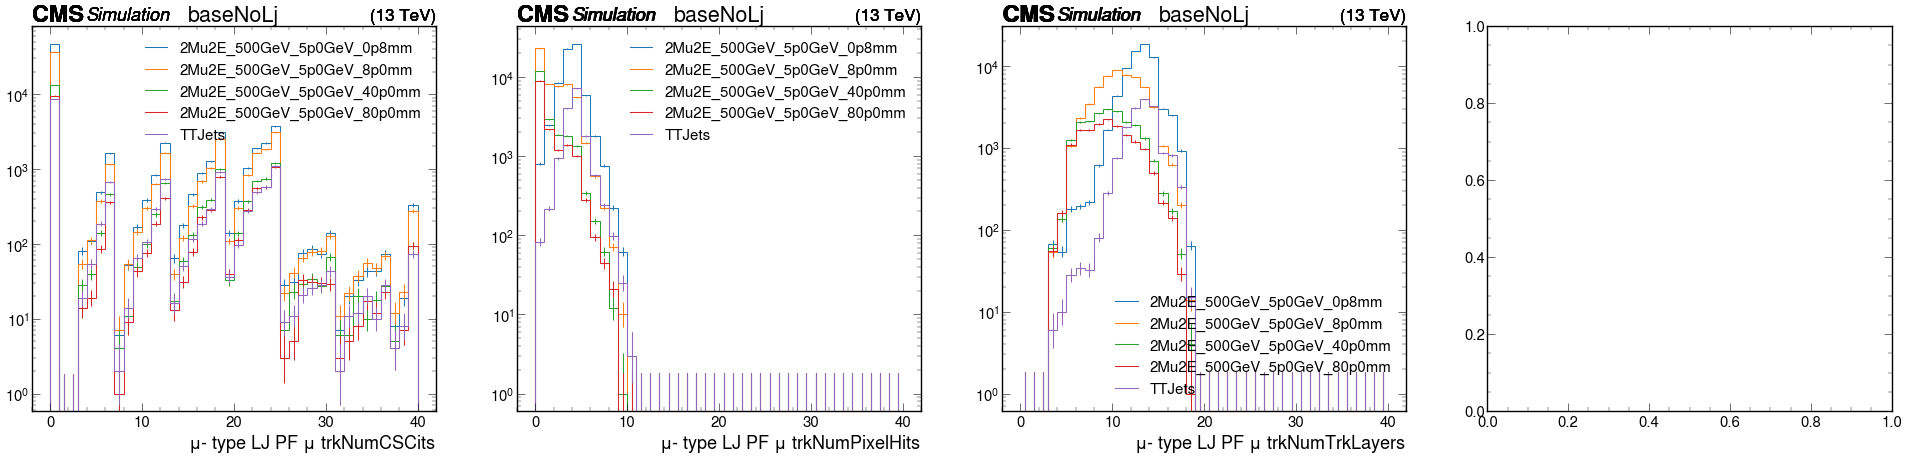

In [16]:
histograms_list = ["mu_lj_pfMu_nTrackerLayers", 
                  "mu_lj_pfMu_trkNumPlanes", "mu_lj_pfMu_trkNumHits", "mu_lj_pfMu_trkNumDTHits",
                   "mu_lj_pfMu_trkNumCSCHits","mu_lj_pfMu_trkNumPixelHits", "mu_lj_pfMu_trkNumTrkLayers", ]
plot_histograms(samples, histograms_list, "baseNoLj", 4, log=True)
